Задание 1

In [1]:
import numpy as np

1.1

In [ ]:
m1 = np.random.random([3, 2])
m2 = np.random.random([3, 4])
print(m1, m2, sep='\n')

[[0.17433869 0.27613577]
 [0.86063684 0.25433228]
 [0.36544157 0.19171669]]
[[0.4871649  0.2392222  0.05188614 0.3773366 ]
 [0.48756331 0.10602175 0.96967745 0.90738458]
 [0.53294249 0.68435706 0.52809607 0.76701589]]


In [ ]:
m3 = np.hstack((m1, m2))
print(m3)

[[0.17433869 0.27613577 0.4871649  0.2392222  0.05188614 0.3773366 ]
 [0.86063684 0.25433228 0.48756331 0.10602175 0.96967745 0.90738458]
 [0.36544157 0.19171669 0.53294249 0.68435706 0.52809607 0.76701589]]


1.2

In [ ]:
m = np.arange(0, 100).reshape(10, 10)
a = np.random.randint(0, 7, size=10)
b = np.random.randint(0, 7, size=10)

res = np.fromiter([m[a[i]][b[i]] for i in range(len(a))], float, -1)
print(res)
# вау, это сработало. Но я не знаю, зачем тут такое "костыльное" упражнение

[32. 25. 33. 13. 21. 16. 63. 15. 12. 12.]


1.3

In [ ]:
print(m.trace())
print(np.count_nonzero(np.diag(m)))

495
9


1.4

In [ ]:
N = 3 * 4 * 2
tensor = np.random.randint(0, N, N).reshape(3, 4, 2)
el, cnts = np.unique(tensor, return_counts=True)
print(np.vstack((el, cnts)))

[[ 0  3  4  5  7 11 12 17 18 19 20 21 22]
 [ 2  2  4  1  3  1  1  1  2  3  1  2  1]]


1.5

In [ ]:
n, m = 4, 5
m1 = np.random.randint(1, 100, size=(m, n))
m2 = np.random.randint(-100, 100, size=(m, n))
print(m1)
print(m2)

print(np.where(m2 > 0, m1, np.zeros(shape=(m, n))))

[[51 89 99 37]
 [58 36 88  6]
 [25  7 84  8]
 [ 9 26 10  6]
 [ 9  9 21 26]]
[[ 55 -48  81 -43]
 [ 74   8 -41  88]
 [-59 -88   5 -87]
 [  3 -33   9  93]
 [  2  60 -76 -62]]
[[51.  0. 99.  0.]
 [58. 36.  0.  6.]
 [ 0.  0. 84.  0.]
 [ 9.  0. 10.  6.]
 [ 9.  9.  0.  0.]]


1.6

In [ ]:
m = np.random.randint(0, 3, size=(5, 4))
ms = np.hsplit(m, 4)
ms_minused = (ms - np.mean(ms))
res = [ms_minused[i] / np.sum(ms_minused[i] ** 2) for i in range(len(ms))]

res = np.hstack(res)
print(res)


# не смог без цикла, хоть и искал

[[-0.22222222 -0.31578947  0.27160494 -0.18556701]
 [ 0.02469136  0.38596491 -0.22222222  0.22680412]
 [-0.22222222  0.03508772  0.02469136 -0.18556701]
 [ 0.27160494  0.03508772 -0.22222222  0.22680412]
 [ 0.27160494 -0.31578947  0.27160494 -0.18556701]]


1.7

In [ ]:
n, m, s = 4, 5, 3
m1 = np.random.randint(0, 10, size=(n, s))
m1 = np.vsplit(m1, n)
m2 = np.random.randint(0, 10, size=(s, m))
m2 = np.hsplit(m2, m)

res = np.array([[np.dot(m1[i], m2[j]) for i in range(n)] for j in range(m)])

print(res.ravel().reshape((m, n)))



[[ 92  27 105  52]
 [ 76  54  48  68]
 [110  52 107  78]
 [113  51 108  78]
 [118  69  96  94]]


1.8

[4.14206780e+07 2.29422400e+06 1.63542770e+07 3.27515730e+07
 1.10675725e+08 1.63903666e+08 1.46427693e+08 6.30558090e+08
 6.52313123e+08 5.67707449e+08 3.88460921e+08 5.50588783e+08
 5.48260775e+08 5.73872141e+08 7.27719097e+08 1.60209618e+09
 8.04890043e+08 1.07198642e+09 8.55553709e+08 1.23545568e+09]
[1.80590000e+04 3.66900200e+06 1.18763370e+07 3.03759370e+07
 4.07832280e+07 7.50206890e+07 9.90990050e+07 1.68372932e+08
 1.68311250e+08 2.22232885e+08 2.42049467e+08 2.77012453e+08
 3.17067666e+08 3.63847594e+08 4.25280196e+08 5.41403438e+08
 5.60462269e+08 6.26148955e+08 6.68267457e+08 8.13415086e+08]


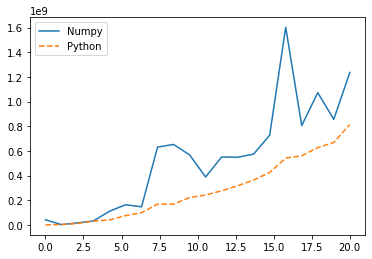

In [15]:
from time import perf_counter_ns
import matplotlib.pyplot as plt

n = 20
time_np = np.zeros(n)
time_pt = np.zeros(n)
for i in range(n):
  long_array = np.random.normal(0, 100, size=(1000* i, 1000 * i))

  
  start = perf_counter_ns()
  result = long_array * long_array
  time_np[i] = perf_counter_ns() - start

  start = perf_counter_ns()
  result = [x * y for x, y in zip(long_array, long_array)]
  time_pt[i] = perf_counter_ns() - start
  

print(time_np)
print(time_pt)

xs = np.linspace(0, n, n)
line1 = plt.plot(xs, np.array(time_np), label='Numpy')
line2 = plt.plot(xs, np.array(time_pt), '--', label = 'Python')
plt.legend()
plt.show()


Задание 2

2.1

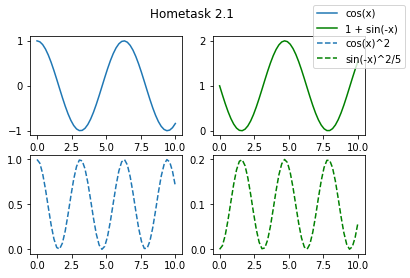

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data
xs = np.linspace(0, 10, 50)
ys1 = np.cos(xs)
ys2 = np.sin(-xs)



# graphics
fig, ax = plt.subplots(2, 2)
ax[0][0].plot(xs, ys1, label='cos(x)')
ax[0][1].plot(xs, ys2 + 1, label='1 + sin(-x)', color='green')
ax[1][0].plot(xs, ys1**2, label='cos(x)^2', ls='--')
ax[1][1].plot(xs, (ys2**2)/5, label='sin(-x)^2/5', ls='--', color='green')

# appearence
fig.suptitle("Hometask 2.1")
fig.legend()
plt.show()

2.2

<ErrorbarContainer object of 3 artists>

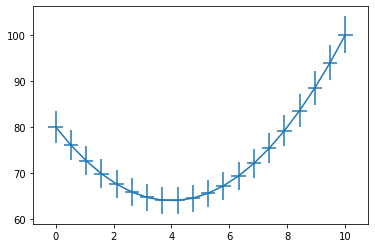

In [ ]:
xs = np.linspace(0, 10, 20)
ys = 100 + (xs - 10) * (xs + 2)
xerr = 0.25
yerr = 0.03 * ys + 1

#plt.scatter(xs, ys)
plt.errorbar(xs, ys, xerr=xerr, yerr=yerr)

2.3

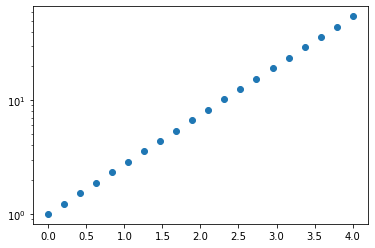

In [ ]:
xs = np.linspace(0, 4, 20)
ys = np.exp(xs)

plt.scatter(xs, ys)
plt.yscale('log')

Задание 3

3.1

[315.28381347 279.22172134 240.32324798 241.52522956 199.29682154
 161.31920732 226.64785993 182.56372354 135.34957527 149.38479381] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<BarContainer object of 10 artists>

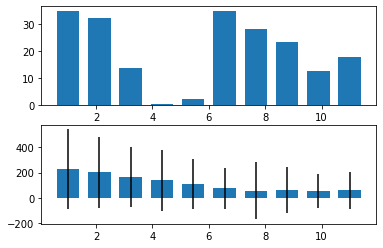

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 10

xs = np.linspace(1, N+1, N)
mat = np.random.normal(0, 10, size=(N, N))
mat = (mat + mat.T)/2
eigens = abs(np.linalg.eigvals(mat))

fig, ax = plt.subplots(2, 1)
ax[0].bar(xs, eigens)

eigens_mean = np.zeros(N)
eigens_max = eigens[:]
eigens_min = np.zeros(N)
for i in range(49):
  mat = np.random.normal(4, 60, size=(N, N))
  mat = (mat + mat.T)/2
  eigens = abs(np.linalg.eigvals(mat))
  eigens_mean += eigens
  #print(eigens, eigens_max)
  eigens_max = np.maximum(eigens_max, eigens)
  eigens_min = np.minimum(eigens_min, eigens)

eigens_mean /= 50
print(eigens_max, eigens_min)
err = np.array(eigens_max) - np.array(eigens_min)
ax[1].bar(xs, eigens_mean, yerr=err)